In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

     Group   Type  Age  Right_answers  Audio_prosody  Combined_channel  \
0  Bipolar   BD I   47             40              9                11   
1  Bipolar   BD I   49             49             13                13   
2  Bipolar   BD I   45             43              9                11   
3  Bipolar   BD I   53             44             10                10   
4  Bipolar  BD II   50             50             14                13   

   Face_video  Body_video  Positive_valence  Negative_valence  Dominant  \
0           9          11                18                22        23   
1          11          12                24                25        24   
2          13          10                21                22        24   
3          12          12                25                19        24   
4          11          12                23                27        23   

   Submissive  
0          17  
1          25  
2          19  
3          20  
4          27  


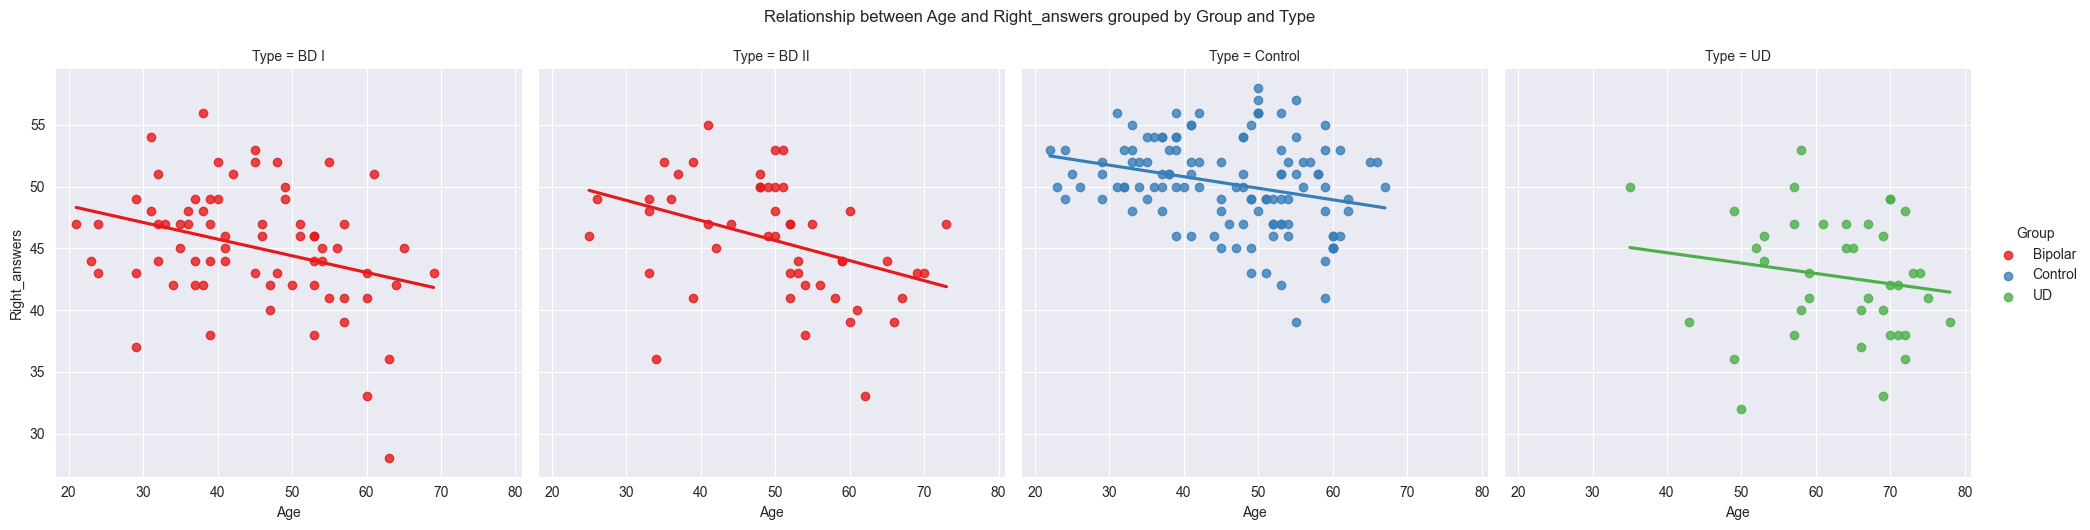

In [8]:
file_path = 'data/data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows to understand the structure of the dataset
print(data.head())

# I am plotting the relationship between Age (covariate) and Right_answers (dependent variable) grouped by Group and Type
sns.lmplot(x='Age', y='Right_answers', hue='Group', col='Type', data=data, ci=None, palette="Set1")
plt.suptitle('Relationship between Age and Right_answers grouped by Group and Type', y=1.05)
plt.show()

In [9]:
# Create a model with Group, Type as factors, and Age as covariate
model = ols('Right_answers ~ C(Group) * C(Type) + Age', data=data).fit()

# Perform ANCOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results of the ANCOVA
print("ANCOVA Table:")
print(anova_table)

ANCOVA Table:
                        sum_sq     df              F        PR(>F)
C(Group)                   NaN    2.0            NaN           NaN
C(Type)          -7.775082e+06    3.0 -146436.514439  1.000000e+00
C(Group):C(Type)  4.740278e+03    6.0      44.639389  1.717107e-17
Age               4.510143e+02    1.0      25.483321  8.180574e-07
Residual          4.813968e+03  272.0            NaN           NaN


/Users/kanetoomer/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/kanetoomer/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/kanetoomer/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/kanetoomer/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 2
  warnings.warn('covariance of constraints does not have full '


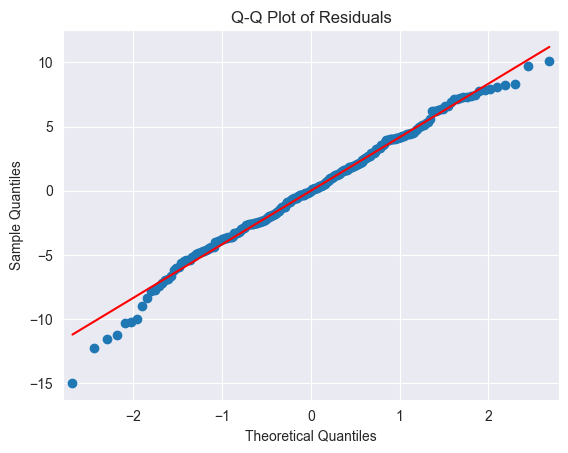

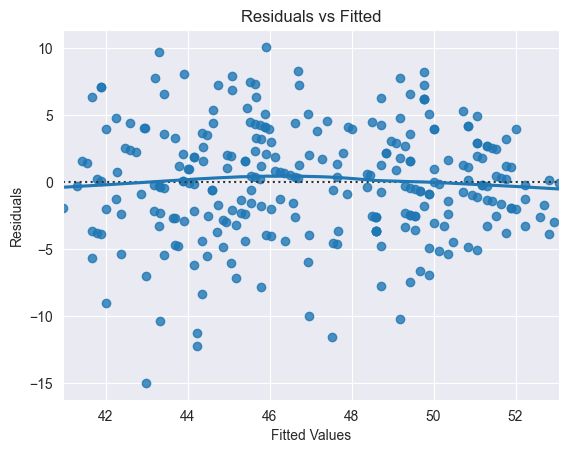

<Figure size 1000x600 with 0 Axes>

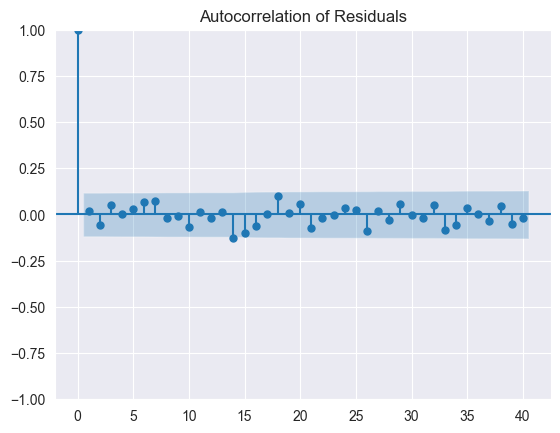

In [10]:
# Check the residuals for normality, equal variance, and independence

# 1. Residuals Normality: Q-Q Plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 2. Residuals Homoscedasticity: Residuals vs. Fitted Plot
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Residuals Independence: Autocorrelation plot
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(model.resid, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()

In [11]:
# Summary of the model
print("Model Summary:")
print(model.summary())

Model Summary:
                            OLS Regression Results                            
Dep. Variable:          Right_answers   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     38.71
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.23e-25
Time:                        11:02:18   Log-Likelihood:                -788.50
No. Observations:                 277   AIC:                             1587.
Df Residuals:                     272   BIC:                             1605.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------